The dataset consists of 3 variables:
    
|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`date`| date of the poll
|`approval`| President's Trump approval rating
|`disapproval`| President's Trump disapproval rating



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TrumpRatings.csv', parse_dates = ['date'])
df.head()

,date,approve,disapprove
0,2017-01-22,45.00,45.000000
1,2017-01-23,45.00,46.000000
2,2017-01-24,44.05,45.100000
3,2017-01-25,43.10,41.933333
4,2017-01-26,43.80,47.200000


#### 1. Create an EXACT copy of the following graph that shows  Persident's Trump daily approval ratings.

- Each of the red horizontal lines represent the annual average approval ratings in 2017, 2018, 2019, and 2020 respectively
- The line chart is grey in color with alpha = 0.3
- The figure size is 10 x 5



In [3]:
tickpositions = list(range(30,52,2))
ticklabels = [str(i)+'%' for i in tickpositions]

In [4]:
approve_2017 = df.loc[(df['date'].dt.year == 2017)]
avg_2017 = approve_2017['approve'].mean()

approve_2018 = df.loc[(df['date'].dt.year == 2018)]
avg_2018 = approve_2018['approve'].mean()

approve_2019 = df.loc[(df['date'].dt.year == 2019)]
avg_2019 = approve_2019['approve'].mean()

approve_2020 = df.loc[(df['date'].dt.year == 2020)]
avg_2020 = approve_2020['approve'].mean()

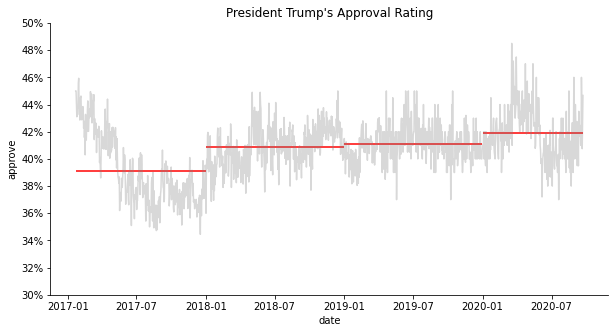

In [5]:
# figure size
plt.figure(figsize=(10,5))

# plot graph
sns.lineplot(data = df,
             x = 'date',
             y = 'approve',
             color = 'grey',
             alpha = 0.3)

# set titles
plt.title("President Trump's Approval Rating")
plt.xlabel('date')
plt.ylabel('approve')

# remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# set annual average line
plt.hlines(y = avg_2017, 
            xmin = min(approve_2017['date']), 
            xmax = max(approve_2017['date']), 
            color = 'red')

plt.hlines(y = avg_2018, 
            xmin = min(approve_2018['date']), 
            xmax = max(approve_2018['date']), 
            color = 'red')

plt.hlines(y = avg_2019, 
            xmin = min(approve_2019['date']), 
            xmax = max(approve_2019['date']), 
            color = 'red')

plt.hlines(y = avg_2020, 
            xmin = min(approve_2020['date']), 
            xmax = max(approve_2020['date']), 
            color = 'red')

# set y axis label
tickpositions = list(range(30,52,2))
ticklabels = [str(i)+'%' for i in tickpositions]
plt.yticks(tickpositions, ticklabels)

plt.show()

#### 2. Create an EXACT copy of the following graph that shows the average monthy difference between Persident's Trump approval and disapproval ratings (Disapproval% - Approval%) since he took office in 2017.

- The span area is green colored with alpha = 0.3
- The 2017, 2018, and 2019 lines are grey with alpha = 0.3
- The 2020 line is red
- The annotation text fontsize for the years is 10
- The figure size is 10 x 5



In [6]:
df['diff'] = df['disapprove'] - df['approve']
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [7]:
diff_year_month = df.\
                    groupby(['year', 'month']).\
                    agg({'diff':'mean'}).\
                    reset_index()

diff_2017 = diff_year_month.loc[diff_year_month['year'] == 2017].reset_index()
diff_2018 = diff_year_month.loc[diff_year_month['year'] == 2018].reset_index()
diff_2019 = diff_year_month.loc[diff_year_month['year'] == 2019].reset_index()
diff_2020 = diff_year_month.loc[diff_year_month['year'] == 2020].reset_index()
diff_2017

,index,year,month,diff
0,0,2017,1,2.240000
1,1,2017,2,7.334286
2,2,2017,3,8.570161
3,3,2017,4,9.983976
4,4,2017,5,13.866989
5,5,2017,6,17.643611
6,6,2017,7,17.157742
7,7,2017,8,20.614032
8,8,2017,9,16.507524
9,9,2017,10,19.305998


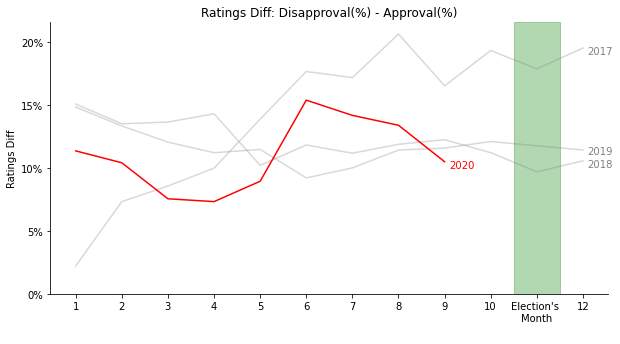

In [8]:
# figure size
plt.figure(figsize=(10,5))

# plot graph
sns.lineplot(data = diff_2017, x = 'month', y = 'diff', color = 'grey', alpha = 0.3)
sns.lineplot(data = diff_2018, x = 'month', y = 'diff', color = 'grey', alpha = 0.3)
sns.lineplot(data = diff_2019, x = 'month', y = 'diff', color = 'grey', alpha = 0.3)
sns.lineplot(data = diff_2020, x = 'month', y = 'diff', color = 'red')

# set titles
plt.title(f'Ratings Diff: Disapproval(%) - Approval(%)')
plt.ylabel('Ratings Diff')
plt.xlabel(' ')

# set x axis label
tickpositions2 = list(range(0,13))
ticklabels2 = list(range(0,13))
ticklabels2[11] = "Election's \nMonth"
plt.xticks(tickpositions2, ticklabels2)

# y axis label
tickpositions3 = list(range(0,25,5))
ticklabels3 = [str(i)+'%' for i in tickpositions3]
plt.yticks(tickpositions3, ticklabels3)

# remvoeo spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# add span
plt.axvspan(xmin = 10.5, xmax = 11.5, color = 'green', alpha = 0.3)

# add annotation
plt.annotate('2017', (12+0.1,(diff_2017['diff'][11]-0.5)), color = 'grey', size = 10)
plt.annotate('2018', (12+0.1,(diff_2018['diff'][11]-0.5)), color = 'grey', size = 10)
plt.annotate('2019', (12+0.1,(diff_2019['diff'][11])-0.3), color = 'grey', size = 10)
plt.annotate('2020', (9+0.1,(diff_2020['diff'][8]-0.5)), color = 'red', size = 10)

plt.show()